In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.api import qqplot


In [3]:
#import dataset
fish_df  = pd.read_csv('fish_dataset.csv')

In [4]:
#drop unnamed column - index column from github export
fish_df = fish_df.iloc[:, 1:]

In [5]:
#Review the head of the dataframe
fish_df.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [6]:
#The fish_df indicates there is a unique species category - identify the unique categories for analysis
fish_df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
#Sample size for each species
fish_df.groupby('Species')[['Category']].count()

,Category
Species,
Bream,35
Parkki,11
Perch,56
Pike,17
Roach,20
Smelt,14
Whitefish,6


In [8]:
#Describe the fish_df
fish_df.describe()

#Describing the data in sum blurs the species in the descriptive statistics below. For this analysis, we will not need the quartiles just yet.
#In addition, given the small sample size of 'Roach', 'Whitefish', 'Parkki', 'Pike', and 'Smelt', I will exclude them from this analysis.
#I will include the 'perch' and 'Perch' in the analysis for comparing weight to Length1.

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [9]:
#Isolating the perch and Perch for analysis
fish_species = ['Bream', 'Perch']

fish_df = fish_df[fish_df['Species'].isin(fish_species)]

In [10]:
#The key components to the analysis are Weight, Height, and Length. For loop derives a description
# of the dataframe by category
fish_species = fish_df['Species'].unique()
for i in fish_species:
    d = fish_df[['Weight', 'Height', 'Width']][fish_df['Species'] == i].describe()
    print("Species: {}".format(i))
    print(d)

Species: Bream
            Weight     Height      Width
count    35.000000  35.000000  35.000000
mean    617.828571  15.183211   5.427614
std     209.205709   1.964707   0.721509
min     242.000000  11.520000   4.020000
25%     462.500000  13.958900   4.943400
50%     610.000000  14.954400   5.280100
75%     717.000000  16.360900   6.071600
max    1000.000000  18.957000   6.749700
Species: Perch
            Weight     Height      Width
count    56.000000  56.000000  56.000000
mean    382.239286   7.861870   4.745723
std     347.617717   2.878177   1.774626
min       5.900000   2.112000   1.408000
25%     120.000000   5.692500   3.525000
50%     207.500000   6.921800   4.154900
75%     692.500000  10.846500   6.448125
max    1100.000000  12.800200   8.142000


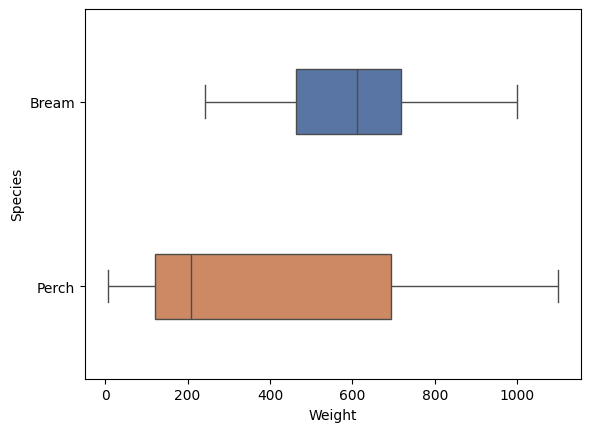

In [11]:
#generate boxplot for weight distributions
#explain why we're going to look at weights first
sns.boxplot(data = fish_df, x='Weight', y='Species', hue="Species",whis=(0, 100), width=.35, palette = "deep")
plt.show()

In [12]:
#Generate mean and standard deviation for Bream and Perch
bream_mean = fish_df[fish_df['Species'] == 'Bream']['Weight'].mean()
bream_std = fish_df[fish_df['Species'] == 'Bream']['Weight'].std()

perch_mean = fish_df[fish_df['Species'] == 'Perch']['Weight'].mean()
perch_std = fish_df[fish_df['Species'] == 'Perch']['Weight'].std()

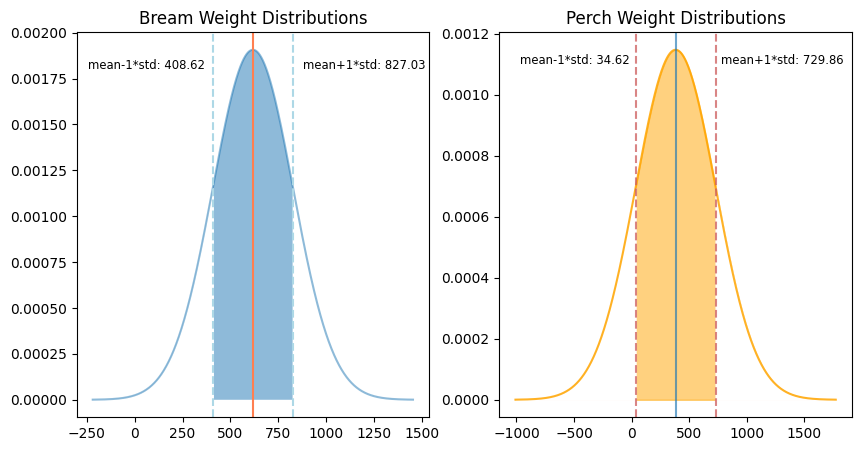

In [13]:
#generate a normal distribution for each species weight
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

#Bream components for the axis
bream_axis = np.arange(bream_mean-(bream_std*4), bream_mean+(bream_std*4), 1)
bream_std_min = bream_mean-bream_std
bream_std_max = bream_mean+bream_std

#Perch components for the axis
perch_std_min = perch_mean-perch_std
perch_std_max = perch_mean+perch_std
perch_axis = np.arange(perch_mean-(perch_std*4), perch_mean+(perch_std*4), 1)

#Bream Axis Components
ax1.plot(bream_axis, norm.pdf(bream_axis, bream_mean, bream_std), alpha = 0.5) 
ax1.fill_between(bream_axis, norm.pdf(bream_axis, bream_mean, bream_std), alpha = .5)
ax1.fill_between(np.arange(bream_std_max,bream_mean+(bream_std*4),1), 
                 norm.pdf(np.arange(bream_std_max,bream_mean+(bream_std*4)), bream_mean, bream_std), color='white')
ax1.axvline(bream_mean, color = 'coral') #mean line
ax1.set_title('Bream Weight Distributions')

ax1.axvline(bream_std_max, linestyle='--', color='lightblue') 
ax1.annotate('mean+1*std: {}'.format(round(bream_std_max, 2)), xy=(bream_std_max, .0018), xytext=(bream_std_max+50, .0018), size = "small")
ax1.fill_between(np.arange(bream_mean-(bream_std*4),bream_std_min,1), 
                 norm.pdf(np.arange(bream_mean-(bream_std*4),bream_std_min,1), bream_mean, bream_std), color='white')

ax1.axvline(bream_std_min, linestyle='--', color='lightblue') 
ax1.annotate('mean-1*std: {}'.format(round(bream_std_min, 2)), xy=(bream_std_min, .0018), xytext=(bream_std_min-650, .0018), size = "small")
ax1.fill_between(np.arange(bream_std_max,bream_mean+(bream_std*4),1), 
                 norm.pdf(np.arange(bream_std_max,bream_mean+(bream_std*4)), bream_mean, bream_std), color='white')


#Perch Axis Components
ax2.plot(perch_axis, norm.pdf(perch_axis, perch_mean, perch_std), color = 'orange', alpha = 0.85)
ax2.fill_between(perch_axis, norm.pdf(perch_axis, perch_mean, perch_std), color = 'orange', alpha = 0.50) 
ax2.axvline(perch_mean, color = '#1f77b4', alpha = 0.65) #mean line
ax2.set_title('Perch Weight Distributions')

ax2.axvline(perch_std_max, linestyle='--', color='indianred', alpha = 0.75) 
ax2.annotate('mean+1*std: {}'.format(round(perch_std_max, 2)), xy=(perch_std_max, .0011), xytext=(perch_std_max+50, .0011), size = "small")
ax2.fill_between(np.arange(perch_mean-(perch_std*4),perch_std_min,1), 
                 norm.pdf(np.arange(perch_mean-(perch_std*4),perch_std_min,1), perch_mean, perch_std), color='white')

ax2.axvline(perch_std_min, linestyle='--', color='indianred', alpha = 0.75) 
ax2.annotate('mean-1*std: {}'.format(round(perch_std_min, 2)), xy=(perch_std_min, .0011), xytext=(perch_std_min-1000, .0011), size = "small")
ax2.fill_between(np.arange(perch_std_max,perch_mean+(perch_std*4),1), 
                 norm.pdf(np.arange(perch_std_max,perch_mean+(perch_std*4)), perch_mean, perch_std), color='white')

plt.show() 

#Based on the normal distributions below, Bream between 408 and 827 grams will likely fall within one standard deviation 
#from the mean. Perch between 34 and 730 grams will k likely fall within one standard deviation. It appears perch weights
#have a broader sprad in weights than Bream. 

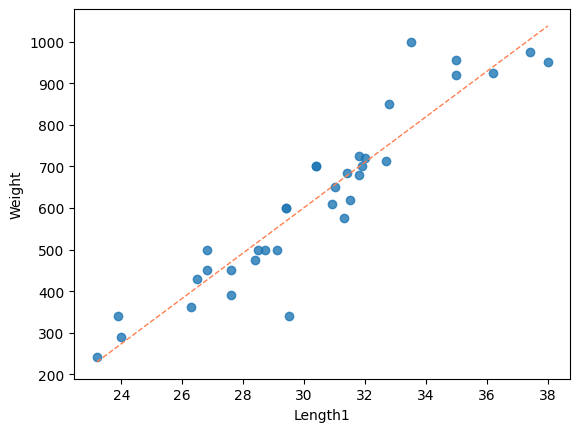

In [14]:
#Regression Analysis of Bream - Width and Length

bream_df = fish_df[fish_df['Species'] == 'Bream']

sns.regplot(data = bream_df, 
                x='Length1', 
                y='Weight',
                ci=None,
                line_kws={'lw':1,'linestyle':'--','color':'coral'})
plt.show()
#There does appear to be a positive linear correlation between bream weight and length. Lets run some regression analysis to be able
#to rasonable predict the weight of breams based on length.

In [15]:
#fit the bream length model
bream_length_model = ols('Weight ~ Length1', data = bream_df).fit()
print(bream_length_model.params)

Intercept   -1035.347565
Length1        54.549981
dtype: float64


In [16]:
#generate explanatory data to test the model
bream_length_explanatory_data = pd.DataFrame(
    {'Length1': np.arange(20, 42)}
)

In [17]:
#generate prediction on explanatory data
bream_length_model_predict = bream_length_model.predict(bream_length_explanatory_data)

In [18]:
#combine data into a dataframe
bream_length_prediction_df = bream_length_explanatory_data.assign(predicted_weight = bream_length_model_predict)
bream_length_prediction_df

,Length1,predicted_weight
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977
5,25,328.401958
6,26,382.951939
7,27,437.501920
8,28,492.051901
9,29,546.601882


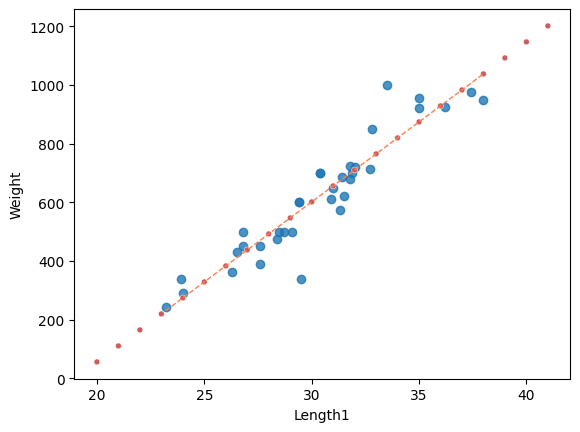

In [19]:
#predicted weights on the regression line
fig = plt.figure()
sns.regplot(data = bream_df, 
                x='Length1', 
                y='Weight',
                ci=None,
                line_kws={'lw':1,'linestyle':'--','color':'coral'})
sns.scatterplot(data=bream_length_prediction_df,
                x="Length1",
                y="predicted_weight",
                color="indianred",
                size=2,
                legend=False
)

plt.show()

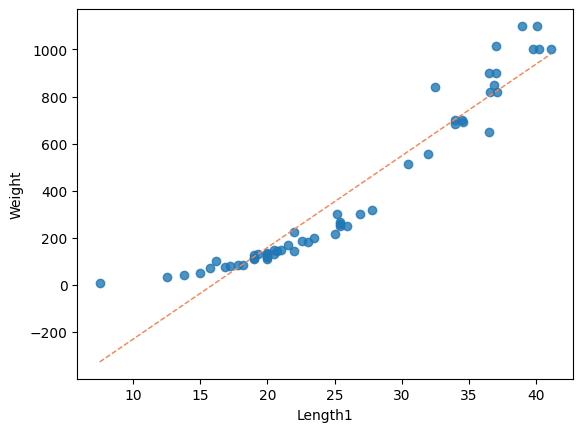

In [20]:
#Run the same data for Perch dataset

perch_df = fish_df[fish_df['Species'] == 'Perch']

sns.regplot(data = perch_df, 
                x='Length1', 
                y='Weight',
                ci=None,
                line_kws={'lw':1,'linestyle':'--','color':'coral'})
plt.show()
#There does appear to be a positive correlation between perch weight and length. However, there does appear to be a curved relationship 
#in the data. data may require additional transformations for regression analysis.

In [21]:
#Cube the length of perch to develop a linear relationship
perch_df['Length_cubed'] = perch_df['Length1'] ** 3


C:\Users\imoore\AppData\Local\Temp\ipykernel_27992\1407440222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch_df['Length_cubed'] = perch_df['Length1'] ** 3


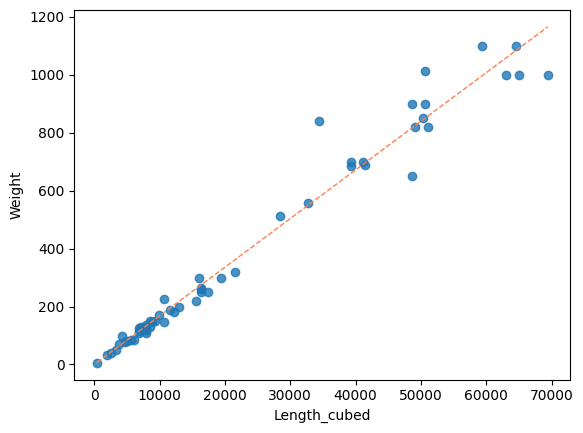

In [22]:
#Regeression plot with cubed values
sns.regplot(data = perch_df, 
                x='Length_cubed', 
                y='Weight',
                ci=None,
                line_kws={'lw':1,'linestyle':'--','color':'coral'})
plt.show()

In [23]:
#create a regression model to fit the data
perch_length_model = ols("Weight ~ Length_cubed", data = perch_df).fit()
perch_length_model.params


Intercept      -0.117478
Length_cubed    0.016796
dtype: float64

In [24]:
#generate explanatory data to test the model
perch_length_explanatory_data = pd.DataFrame(
    {'Length_cubed': np.arange(0,45)**3,
     'Length1': np.arange(0,45)}
)

In [25]:
#generate prediction on explanatory data
perch_length_model_predict = perch_length_model.predict(perch_length_explanatory_data)

In [26]:
#combine data into a dataframe
perch_length_prediction_df = perch_length_explanatory_data.assign(predicted_weight = perch_length_model_predict)
perch_length_prediction_df

,Length_cubed,Length1,predicted_weight
0,0,0,-0.117478
1,1,1,-0.100682
2,8,2,0.016887
3,27,3,0.336004
4,64,4,0.957441
5,125,5,1.981974
6,216,6,3.510375
7,343,7,5.643417
8,512,8,8.481876
9,729,9,12.126524


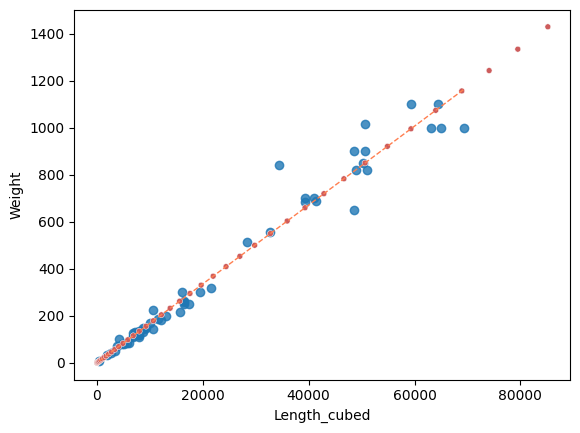

In [27]:
#predicted weights on the regression line with cubed values
fig = plt.figure()
sns.regplot(data = perch_df, 
                x='Length_cubed', 
                y='Weight',
                ci=None,
                line_kws={'lw':1,'linestyle':'--','color':'coral'})
sns.scatterplot(data=perch_length_prediction_df,
                x="Length_cubed",
                y="predicted_weight",
                color="indianred",
                size=2,
                legend=False
)

plt.show()

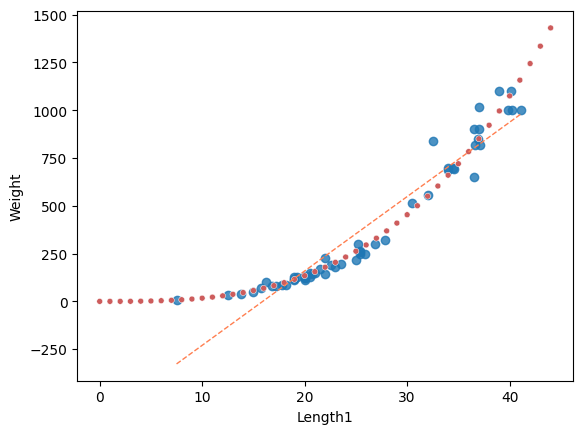

In [28]:
#predicted weights on the regression line with actual values
fig = plt.figure()
sns.regplot(data = perch_df, 
                x='Length1', 
                y='Weight',
                ci=None,
                line_kws={'lw':1,'linestyle':'--','color':'coral'})
sns.scatterplot(data=perch_length_prediction_df,
                x="Length1",
                y="predicted_weight",
                color="indianred",
                size=2,
                legend=False
)

plt.show()

Bream Model Fit
Correlation Coefficient: 0.9370500037429791
R-Squared: 0.8780627095147175
RSE: 74.15224261594196


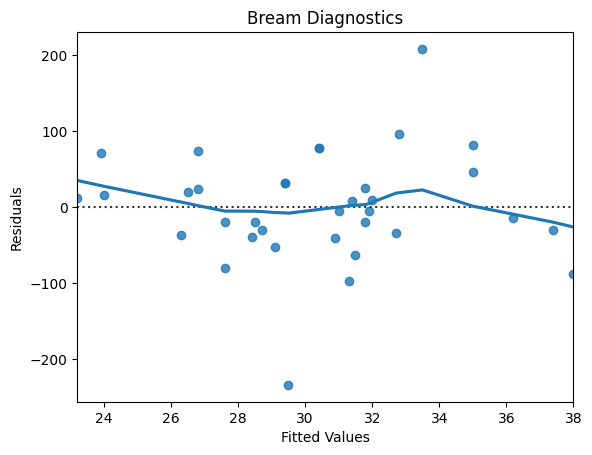

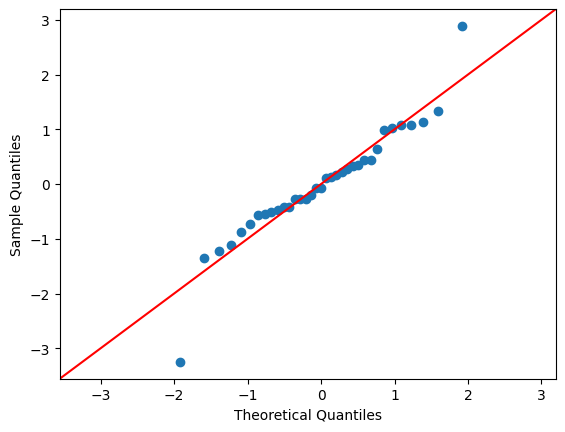

In [48]:
#Lets assess the fit of these models
#function to generate general assesment criteria
def model_assess(d, mod):
    coeff = d['Length1'].corr(d['Weight'])
    r_sq = mod.rsquared
    rse = np.sqrt(mod.mse_resid)
    print("Correlation Coefficient: {}".format(coeff))
    print("R-Squared: {}".format(r_sq))
    print("RSE: {}".format(rse))

print("Bream Model Fit")
model_assess(bream_df, bream_length_model)
#"The difference between predicted bream weight and observed bream weight is typically about 74g"
##Residuals vs fitted values
sns.residplot(x= "Length1", y="Weight", data=bream_df, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Bream Diagnostics")
##QQPlot
qqplot(data=bream_length_model.resid, fit=True, line="45")
plt.show()



Perch Model Fit
Correlation Coefficient: 0.9583612132983198
R-Squared: 0.9692457595330382
RSE: 61.52319358499549


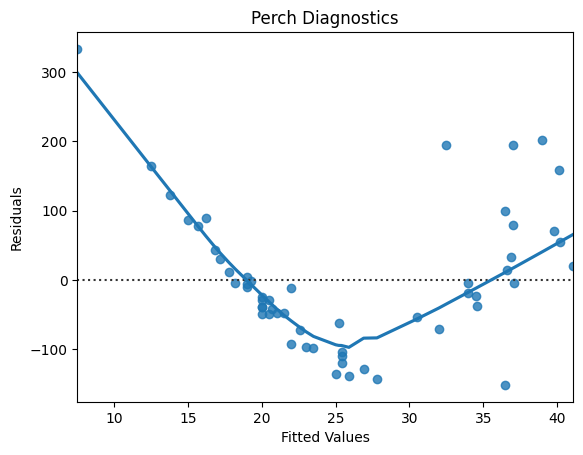

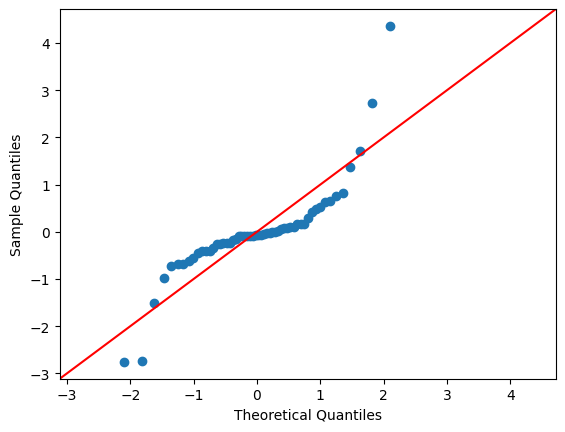

In [49]:
#Perch model 
print("Perch Model Fit")
model_assess(perch_df, perch_length_model)
#"The difference between predicted perch wweight and observed perch weight is typically about 62g"
##Residuals vs fitted values
sns.residplot(x= "Length1", y="Weight", data=perch_df, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Perch Diagnostics")

##QQPlot
qqplot(data=perch_length_model.resid, fit=True, line="45")
plt.show()
#It appears the perch model is a better fit with a R-squared of .97. This is due to the cubed values
#generated for the model being a closer fit the observed weights. However, the diagnostics do show
#residuals to be quite dispersed and possibly overfitted to the model. The model is good at predicting
#weights but the weight and length do not appear to share a strong linear relationship. 